<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [4]:
import numpy as np
# Your code here


### 1.2 NumPy’s PRNG

In [3]:
np.random.rand()                # Give one number


0.5793459908622979

In [4]:
np.random.rand(10)              # Give ten numbers`

array([0.51954845, 0.13657699, 0.92623967, 0.02050463, 0.32714281,
       0.90936819, 0.53598663, 0.73459961, 0.48682372, 0.42351318])

In [5]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.99789542, 0.43026402],
       [0.53764405, 0.91119097],
       [0.53746487, 0.11947442],
       [0.45008136, 0.80547215],
       [0.55579337, 0.09971684]])

In [7]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.96

In [8]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.2

In [9]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.31

### 1.3 A simple graphical test

In [2]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Value of random number')

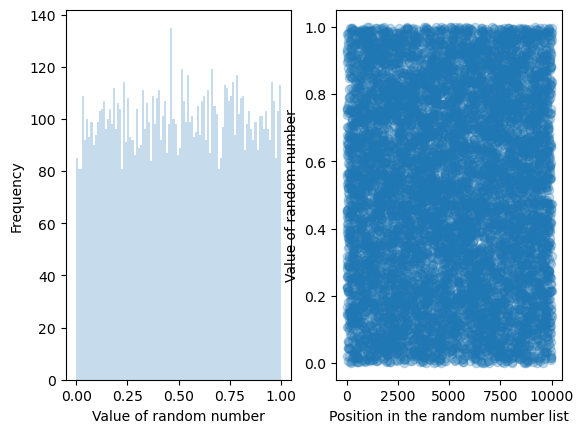

In [12]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

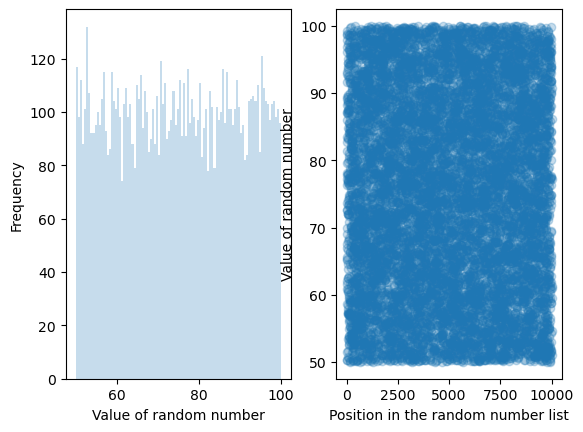

In [13]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [14]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([75, 74, 32, 35, 77, 94, 88, 82, 27, 41])

In [15]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([93, 22, 28, 13, 68, 66, 72, 49, 90, 52])

In [16]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [17]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [11]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will hui en become rich',
             'Will hui en get a bf soon?',
             'will hui ens GPA improve?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will hui en become rich
A: My reply is no.

Q: Will hui en get a bf soon?
A: Don't count on it.

Q: will hui ens GPA improve?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [22]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [23]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Tails', 'Head', 'Head', 'Head', 'Tails', 'Tails', 'Tails',
       'Head', 'Tails'], dtype='<U5')

In [27]:
# consider any number in (0, .5] to be Tails 
#and any number in (.5, 1) to be Heads, then the following works too.
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins) 
    #giving an array of 10 numbers from 0 to 1 
    no_of_heads = np.sum(results > probability) 
    #wtv value that is above 0.5 is considered as heads and is returned
    return no_of_heads

flip_coins(10)

4

In [28]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.10%


### 3.2 A biased coin

In [14]:
no_of_coins = 1000 #probability of head is 0.7
no_of_heads = flip_coins(no_of_coins, probability = .3) # changing it from 0.5
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 70.10%


### 3.3 A flipping experiment

In [15]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
#np.unique() with return_counts=True returns the unique values (of Heads) 
#in the list and how many times they occur. 
#We can get the probabilities by dividing the array with the counts by the number of repeats.
heads_probability = heads_counts/no_of_repeats
print(heads_probability)

[0.001  0.0088 0.046  0.1123 0.2051 0.2516 0.2063 0.1122 0.0443 0.0116
 0.0008]


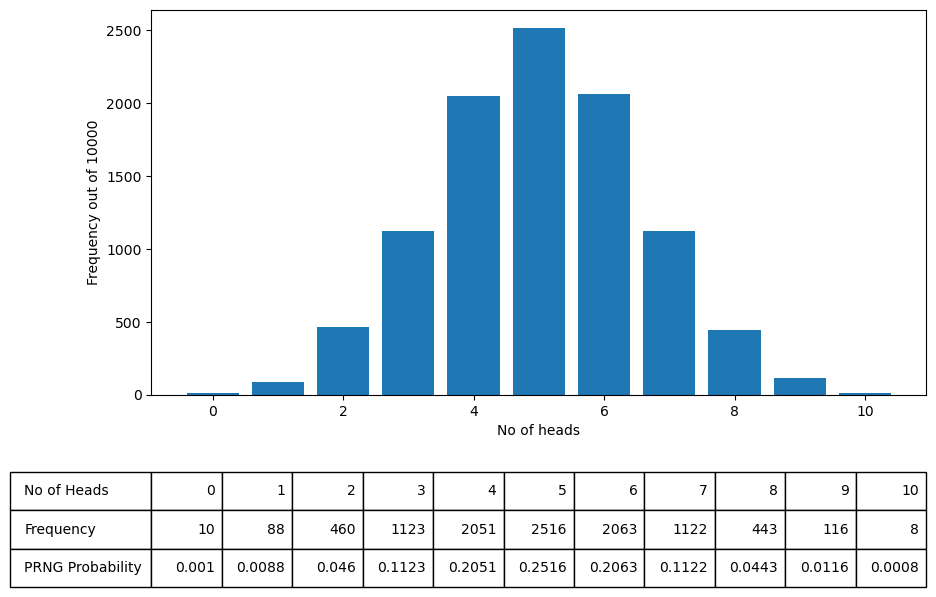

In [16]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [2]:
from scipy.stats import binom
binom.pmf(k=7, n=10, p=.5)
# discrete binomial distribution (heads or tails)
# pmf() probability mass function - gives the probabilites for the various
# possibitilies of the discrete distribution

0.11718749999999996

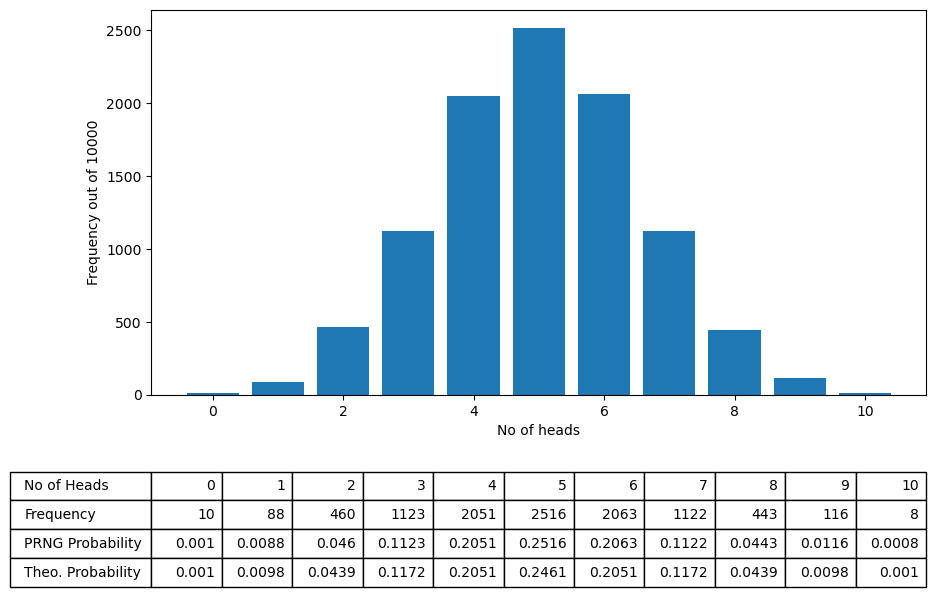

In [35]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)


plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, np.round(binomial_probabilities, 4)],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Theo. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3], fontsize=20)


## Exercise 1 :  12C, 13C

In [5]:
boo = []
def generate(number):
    for x in range(number+1):
        boo.append(isotope_abundance(27))
        y = np.asarray(boo)
    return y, f'the mean value of C_13 atoms is {np.mean(y):.4f}', f' the standard deviation value of C_13 atoms is {np.std(y):.4f}'

def isotope_abundance(no_of_C=1, probability=.0111):
    
    results = np.random.rand(no_of_C)
    no_of_C13 = np.sum(results < probability)
    return no_of_C13    

generate(1000)

(array([0, 0, 0, ..., 1, 0, 0]),
 'the mean value of C_13 atoms is 0.2997',
 ' the standard deviation value of C_13 atoms is 0.5402')

In [6]:
boo = []
def generate(number):
    for x in range(number+1):
        boo.append(isotope_abundance(27)/27*100)
        y = np.asarray(boo)
    return f'The probability that a cholesterol molecule has no atoms of C13 is {np.count_nonzero(y==0)/number*100}%'


def isotope_abundance(no_of_C=1, probability=.0111):
    
    results = np.random.rand(no_of_C)
    no_of_C13 = np.sum(results < probability)
    return no_of_C13  

generate(1000)

'The probability that a cholesterol molecule has no atoms of C13 is 75.7%'